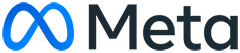

# **Getting to know Llama 3: Everything you need to start building**
Our goal in this session is to provide a guided tour of Llama 3 with comparison with Llama 2, including understanding different Llama 3 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 3 projects.

### **0 - Prerequisites**
* Basic understanding of Large Language Models
* Basic understanding of Python

In [1]:
!python3 -m pip install matplotlib ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 897 kB/s eta 0:00:01     |█████████████████▏              | 4.0 MB 897 kB/s eta 0:00:04
     |████████████████████████████████| 139 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 6.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain)
    C-->|User Input|D[Llama 3]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 3]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama3_family():
  mm("""
  graph LR;
      llama-3 --> llama-3-8b
      llama-3 --> llama-3-70b
      llama-3-8b --> llama-3-8b
      llama-3-8b --> llama-3-8b-instruct
      llama-3-70b --> llama-3-70b
      llama-3-70b --> llama-3-70b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_3
  Llama_3 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


### **1 - Understanding Llama 3**

### **1.1 - What is Llama 3?**

* State of the art (SOTA), Open Source LLM
* 8B, 70B
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Meta Llama 3 Blog](https://ai.meta.com/blog/meta-llama-3/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

In [3]:
llama2_family()

In [4]:
llama3_family()

### **1.2 - Accessing Llama 3**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Groq](https://console.groq.com/), [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 3**
* Content Generation
* Summarization
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat about Your Own Data
* Fine-tuning
* Agents

## **2 - Using and Comparing Llama 3 and Llama 2**

In this notebook, we will use the Llama 2 70b chat and Llama 3 8b and 70b instruct models hosted on [Groq](https://console.groq.com/). You'll need to first [sign in](https://console.groq.com/) with your github or gmail account, then get an [API token](https://console.groq.com/keys) to try Groq out for free. (Groq runs Llama models very fast and they only support one Llama 2 model: the Llama 2 70b chat).

**Note: You can also use other Llama hosting providers such as [Replicate](https://replicate.com/blog/run-llama-3-with-an-api?input=python), [Togther](https://docs.together.ai/docs/quickstart). Simply click the links here to see how to run `pip install` and use their freel trial API key with example code to modify the following three cells in 2.1 and 2.2.**


### **2.1 - Install dependencies**

### **2.2 - Create helpers for Llama 2 and Llama 3**


Create Llama 2 and Llama 3 helper functions - for chatbot type of apps, we'll use Llama 3 8b/70b instruct models, not the base models.

In [3]:
!python3 -m pip install langchain replicate

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 817 kB 816 kB/s eta 0:00:01
     |████████████████████████████████| 115 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 409 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 174 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 299 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 390 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 53 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████

In [6]:
from langchain.llms import Replicate
import os

# Get a free API key from https://replicate.com/account/api-tokens
os.environ["REPLICATE_API_TOKEN"] = "r8_BxHtJkxn9QGfIKAtdI9BTBlPNNy66ut09JOB8"

LLAMA2_70B_CHAT = "meta/llama-2-70b-chat"
LLAMA3_70B_CHAT = "meta/meta-llama-3-70b-instruct"
LLAMA3_8B_CHAT = "meta/meta-llama-3-8b-instruct"

DEFAULT_MODEL = LLAMA3_70B_CHAT

def completion(
    prompt: str,
    model: str = DEFAULT_MODEL,
    temperature: float = 0.6,
    top_p: float = 0.9,
) -> str:
    llm = Replicate(
        model=model,
        model_kwargs={"temperature": temperature,"top_p": top_p, "max_new_tokens": 1000}
    )
    return llm(prompt)

def llama2(prompt, temperature=0.6, top_p=0.9):
    return completion(prompt, LLAMA2_70B_CHAT, temperature, top_p)

def llama3_8b(prompt, temperature=0.6, top_p=0.9):
    return completion(prompt, LLAMA3_8B_CHAT, temperature, top_p)

def llama3_70b(prompt, temperature=0.6, top_p=0.9):
    return completion(prompt, LLAMA3_70B_CHAT, temperature, top_p)


### **2.3 - Basic QA with Llama 2 and 3**

In [8]:
prompt = "The typical color of a llama is: "
output = llama3_8b(prompt)
md(output)

ReplicateError: ReplicateError Details:
title: Unauthenticated
status: 401
detail: You did not pass a valid authentication token

In [10]:
output = llama3_8b("The typical color of a llama is what? Answer in one word.")
md(output)

White.

## **3 - Chat conversation**

### **3.1 - Single-turn chat**

In [10]:
prompt_chat = "What is the average lifespan of a Llama? Answer the question in few words."
output = llama2(prompt_chat)
md(output)

Sure, here's a short answer:

The average lifespan of a llama is 15-25 years.

In [11]:
output = llama3_8b(prompt_chat)
md(output)

15-20 years.

In [12]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama2(prompt_chat)
md(output)

The lion, tiger, leopard, and jaguar are all members of the Felidae family.

In [13]:
output = llama3_8b(prompt_chat)
md(output)

Canidae.

In [14]:
output = llama3_70b(prompt_chat)
md(output)

I'm happy to help! However, I don't see a specific animal mentioned in your question. Could you please clarify or provide more context about which animal you're referring to?

**Note: Llama 3 70b doesn't hallucinate.**

### **3.2 - Multi-turn chat**
Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [15]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: 15-20 years.
User: What animal family are they?
"""
output = llama2(prompt_chat)
md(output)

Assistant: Llamas are part of the Camelidae family, which includes camels and alpacas.

In [16]:
output = llama3_8b(prompt_chat)
md(output)

Llamas belong to the camelid family (Camelidae).

**Note: Llama 2 and 3 both behave well for using the chat history for follow up questions.**

### **3.3 - Multi-turn chat with more instruction**
Adding the instructon "Answer the question with one word" to see the difference of Llama 2 and 3.

In [17]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question with one word.
"""
output = llama2(prompt_chat)
md(output)

Camelids

In [18]:
output = llama3_8b(prompt_chat)
md(output)

Camelid.

**Both Llama 3 8b and Llama 2 70b follows instructions (e.g. "Answer the question with one word") better than Llama 2 7b.**

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [19]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llama2(prompt)
md(output)

Curious

In [20]:
output = llama3_8b(prompt)
md(output)

Neutral

**Note: Llama 3 has different opinions than Llama 2.**

In [21]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llama2(prompt)
md(output)

Neutral

In [22]:
output = llama3_8b(prompt)
md(output)

Neutral

**Note: Llama 2, with few shots, has the same output "Neutral" as Llama 3.**

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [25]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = llama3_8b(prompt)
md(output)

Seven.

In [26]:
output = llama3_70b(prompt)
md(output)

Eleven.

**Note: Llama 3-8b did not get the right answer because it was asked to answer in one word.**

In [27]:
# By default, Llama 3 models follow "Chain-Of-Thought" prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?
'''

output = llama3_8b(prompt)
md(output)

Let's break it down step by step!

Llama started with 5 tennis balls.

It buys 2 more cans of tennis balls. Each can has 3 tennis balls, so that's a total of 2 x 3 = 6 new tennis balls.

Adding the new tennis balls to the original 5, Llama now has:
5 (initial tennis balls) + 6 (new tennis balls) = 11 tennis balls

So, Llama now has 11 tennis balls!

In [28]:
output = llama3_70b(prompt)
md(output)

Llama started with 5 tennis balls. Then it bought 2 cans of tennis balls. Each can has 3 tennis balls. So that is 2 x 3 = 6 tennis balls. 5 + 6 = 11.
#### 11

**Note: By default, Llama 3 models identify word problems and solves it step by step!**

In [ ]:
prompt = """
15 of us want to go to a restaurant.
Two of them have cars
Each car can seat 5 people.
Two of us have motorcycles.
Each motorcycle can fit 2 people.
Can we all get to the restaurant by car or motorcycle?
Think step by step.
Provide the answer as a single yes/no answer first.
Then explain each intermediate step.
"""
output = llama3_8b(prompt)
print(output)

In [ ]:
output = llama3_70b(prompt)
print(output)

**Note: Llama 3 70b model works correctly in this example.**

**Summary: Llama 2 often needs encourgement for step by step thinking to correctly reasoning. Llama 3 understands, reasons and explains better, making chain of thought unnecessary in the cases above.**

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





In [29]:
rag_arch()

#### **4.3.1 - LangChain**
LangChain is a framework that helps make it easier to implement RAG.

In [11]:
!python3 -m pip install langchain
!python3 -m pip install sentence-transformers
!python3 -m pip install faiss-cpu
!python3 -m pip install bs4

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 799.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 6.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB

#### **4.3.2 - LangChain Q&A Retriever**
* ConversationalRetrievalChain

* Query the Source documents


In [14]:
# Fix the SSL wrong version number bug in OSX python 3.9 urllib
!python3 -m pip install --upgrade urllib3

Defaulting to user installation because normal site-packages is not writeable


In [15]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# Step 1: Load the document from a web url
loader = WebBaseLoader(["https://huggingface.co/blog/llama3"])
documents = loader.load()

# Step 2: Split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Step 3: Store the document into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:

llm = Replicate(
        model=LLAMA3_8B_CHAT,
        model_kwargs={"temperature": 0.6, "top_p": 0.9, "max_new_tokens": 1000}
    )

from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llm,
                                              vectorstore.as_retriever(),
                                              return_source_documents=True)

result = chain({"question": "What’s new with Llama 3?", "chat_history": []})
md(result['answer'])


/Users/lihw/Library/Python/3.9/lib/python/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


According to the text, what's new with Llama 3 is:

* It introduces 4 new open LLM models by Meta based on the Llama 2 architecture.
* The models come in two sizes: 8B and 70B parameters, each with base (pre-trained) and instruct-tuned versions.
* All variants can be run on various types of consumer hardware and have a context length of 8K tokens.
* A new tokenizer is used, which expands the vocabulary size to 128,256 (from 32K tokens in the previous version).
* A new version of Llama Guard was fine-tuned on Llama 3 8B and is released as Llama Guard 2 (safety fine-tune).

In [33]:
# Query against your own data
from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llm, vectorstore.as_retriever(), return_source_documents=True)

chat_history = []
query = "What’s new with Llama 3?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

According to the provided context, the main changes in Llama 3 compared to Llama 2 are:

1. A new tokenizer that expands the vocabulary size to 128,256 (from 32K tokens in the previous version), which can encode text more efficiently and potentially yield stronger multilingualism.
2. The introduction of two sizes: 8B for efficient deployment and development on consumer-size GPU, and 70B for large-scale AI native applications.
3. The availability of base and instruction-tuned variants for each model size.
4. The release of Llama Guard 2, a new version of Llama Guard that was fine-tuned on Llama 3 8B.

In [34]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "What two sizes?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

According to the text, the two sizes of Llama 3 are 8B and 70B parameters.

## **5 - Fine-Tuning Models**

* Limitatons of Prompt Eng and RAG
* Fine-Tuning Arch
* Types (PEFT, LoRA, QLoRA)
* Using PyTorch for Pre-Training & Fine-Tuning

* Evals + Quality

Examples of Fine-Tuning:
* [Meta Llama Recipes](https://github.com/meta-llama/llama-recipes/tree/main/recipes/finetuning)
* [Hugging Face fine-tuning with Llama 3](https://huggingface.co/blog/llama3#fine-tuning-with-%F0%9F%A4%97-trl)


## **6 - Responsible AI**

* Power + Responsibility
* Hallucinations
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



## **7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community
* Safety and responsible use is paramount!

* Call-To-Action
  * [Replicate Free Credits](https://replicate.fyi/connect2023) for Connect attendees!
  * This notebook is available through Llama Github recipes
  * Use Llama in your projects and give us feedback


#### **Resources**
- [Meta Llama 3 Blog](https://ai.meta.com/blog/meta-llama-3/)
- [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)
- [Llama 3 repo](https://github.com/meta-llama/llama3)
- [Llama 3 model card](https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md)
- [LLama 3 Recipes repo](https://github.com/meta-llama/llama-recipes)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)

